### Import pachages

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u  
from astropy.coordinates import SkyCoord
from scipy import stats

### Import Files

In [32]:
filenametxt='/home/juan/Desktop/Research/Data2.0/CoordsPeakDMass.txt'

### Source Info.

In [33]:
ra,dec,pkintC18O,mass= np.loadtxt(filenametxt,unpack=True,usecols=(0,1,2,3),dtype='S')
coord=SkyCoord(ra,dec,frame='icrs',unit=(u.hourangle,u.deg))

### C18O Peak Intensity

In [34]:
lpkintC18O=[]
for i in range(len(pkintC18O)):
	lpkintC18O.append(float(pkintC18O[i]))

### Source Distance

In [35]:
c1=SkyCoord(ra=277.5148313*u.degree, dec=-2.048732216*u.degree, distance=436*u.pc, frame='icrs')
ldist=[]
for i in range(len(coord)):
	c2 = SkyCoord(ra=coord[i].ra, dec=coord[i].dec, distance=436*u.pc, frame='icrs')
	dist=c1.separation_3d(c2)
	ldist.append(dist.value)

### Dust Mass

In [36]:
lcontmass=[]
for i in range(len(mass)):
	lcontmass.append(float(mass[i]))

### Plot

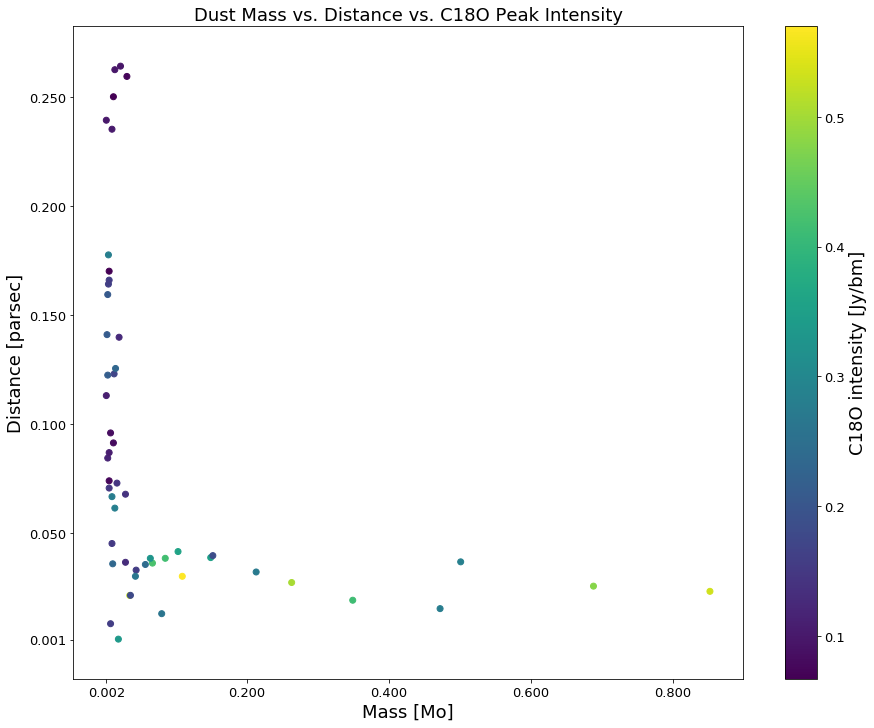

In [50]:
figname='Dust Mass vs. Distance vs. C18O Peak Intensity'
fig=plt.figure('Dust Mass vs. Distance vs. C18O Peak Intensity',figsize=(15,12))
plt.title('Dust Mass vs. Distance vs. C18O Peak Intensity')
plt.ylabel('Distance [parsec]',size=18)
plt.xlabel('Mass [Mo]',size=18)
#plt.yticks(np.arange(min(ldist),max(ldist)+0.005,0.5))
plt.yticks(np.array([0.001,0.05,0.1,0.15,0.2,0.25,0.3]))
#plt.xticks(np.arange(min(lcontmass),max(lcontmass),0.05))
plt.xticks(np.array([0.002,0.2,0.4,0.6,0.8,0.9]))
plt.scatter(lcontmass,ldist,c=lpkintC18O,cmap='viridis',zorder=8)
plt.colorbar(label='C18O intensity [Jy/bm]')
plt.clim(min(lpkintC18O),max(lpkintC18O))
plt.rc('axes', labelsize=18, titlesize=18)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
#plt.legend()
#fig.savefig(figname+'.png')
#plt.show()
#plt.close(fig)